# Self study data analysis

I want to evaluate self-study data with the methods validated in `parameter_retrieval.ipynb`.
The analysis is rather rudimentary right now, it can only only compare posteriors of one model of treatment and control condition.

## Calculate Posteriors

In [2]:
#import calculate_posteriors

## Load posteriors

In [1]:
import numpy as np
import pymc3 as pm
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
print('importing done')

# Load the pickled traces and models and extract Information Criteria
traces, models = {}, {}
for name in [x[0] for x in os.walk('./pymc3_files/')]:
    if '__py' in name or name == '.' or 'checkpoints' in name or 'git' in name or name=='./pymc3_files/':
        continue
        
    print('loading',name)
    with open(name + '/data.pickle', 'rb') as pickle_file:
        
        data = pickle.load(pickle_file)
        start, thin = 1000, 5
        traces[name] = data['trace'][start::thin]
        models[name] = data['model']
        
trace_names = list(traces.keys())
trace_names.sort()        

importing done
loading ./pymc3_files/happy
loading ./pymc3_files/unhappy
loading ./pymc3_files/stable
loading ./pymc3_files/calm
loading ./pymc3_files/narrow
loading ./pymc3_files/motivated
loading ./pymc3_files/worry


## Text summary

In [14]:
for i in range(0, len(trace_names)):
    print(trace_names[i])
    print(pm.df_summary(traces[trace_names[i]], varnames=['effect_mean']))

./pymc3_files/calm
                 mean        sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.443121  1.479971  0.023789 -3.254158  2.338027
./pymc3_files/happy
                 mean        sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.006904  1.503217  0.024556 -2.937925  2.814759
./pymc3_files/motivated
                 mean        sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.024973  1.391471  0.023323 -2.873869  2.522292
./pymc3_files/narrow
                mean        sd  mc_error  hpd_2.5  hpd_97.5
effect_mean -0.13293  1.508614  0.023386 -3.19556  2.638794
./pymc3_files/stable
                 mean        sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.183284  1.524966  0.028002 -3.174615  2.606467
./pymc3_files/unhappy
                 mean       sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.142687  1.43388  0.022939 -2.835448  2.675774
./pymc3_files/worry
                 mean        sd  mc_error   hpd_2.5  hpd_97.5
effect_mean -0.170245  1.484674  0.023999 -2.949158  

## Plot posteriors

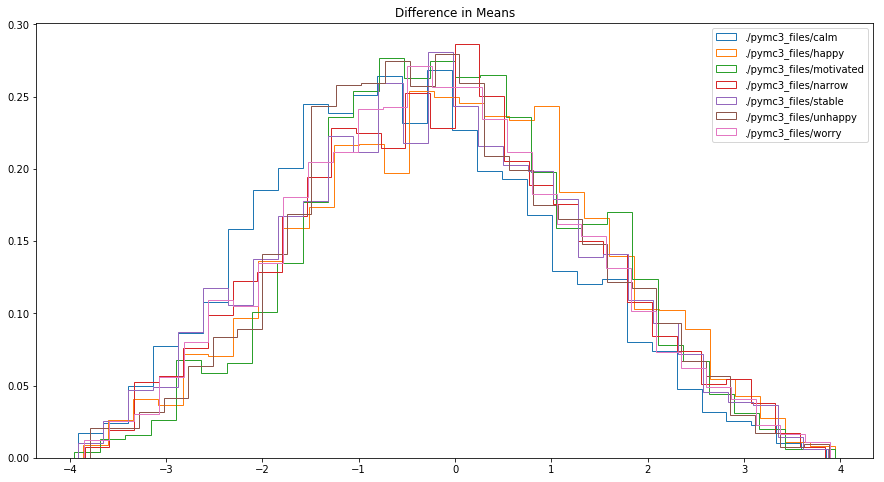

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=True)

plt.title('Difference in Means')
for i in range(0, len(trace_names)):
    trace = traces[trace_names[i]]
    ax.hist(trace['effect_mean'], 30, histtype='step', normed=True, label=trace_names[i])
    
ax.legend(loc='best')

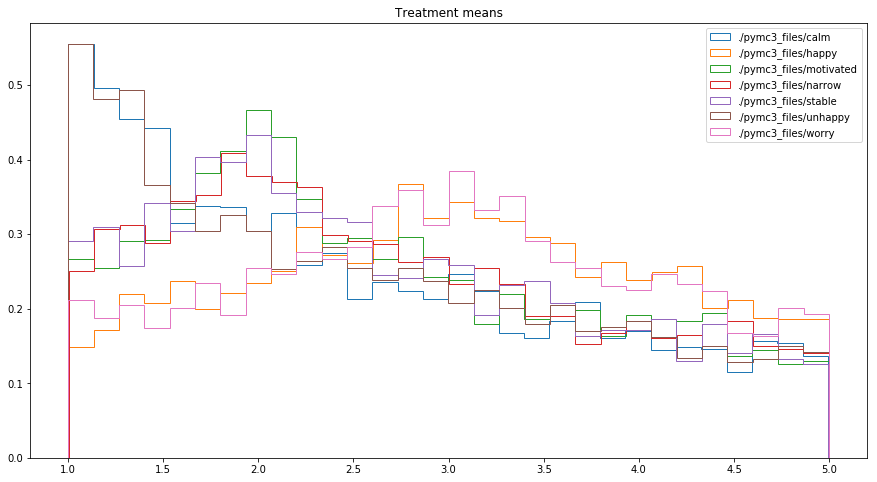

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=True)

plt.title('Treatment means')
for i in range(0, len(trace_names)):
    trace = traces[trace_names[i]]
    ax.hist(trace['treatment_mean'], 30, histtype='step', normed=True, label=trace_names[i])
    
ax.legend(loc='best')

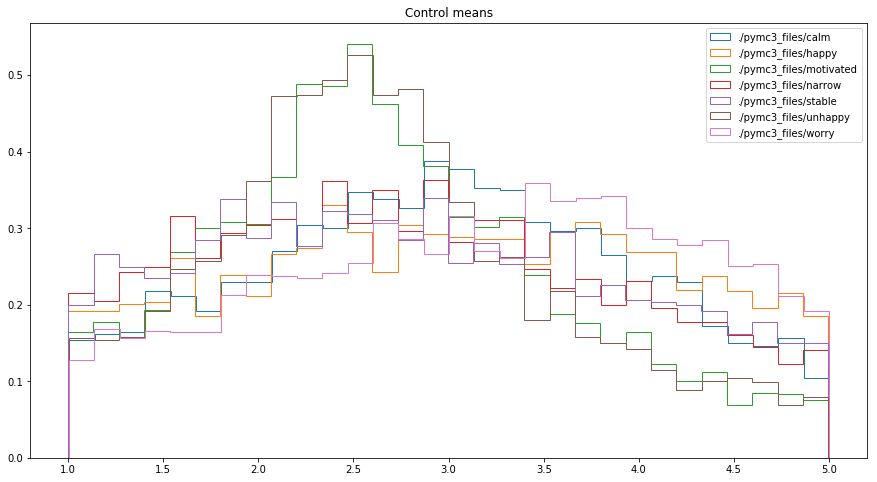

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=True)

plt.title('Control means')
for i in range(0, len(trace_names)):
    trace = traces[trace_names[i]]
    ax.hist(trace['control_mean'], 30, histtype='step', normed=True, label=trace_names[i])
    
ax.legend(loc='best')

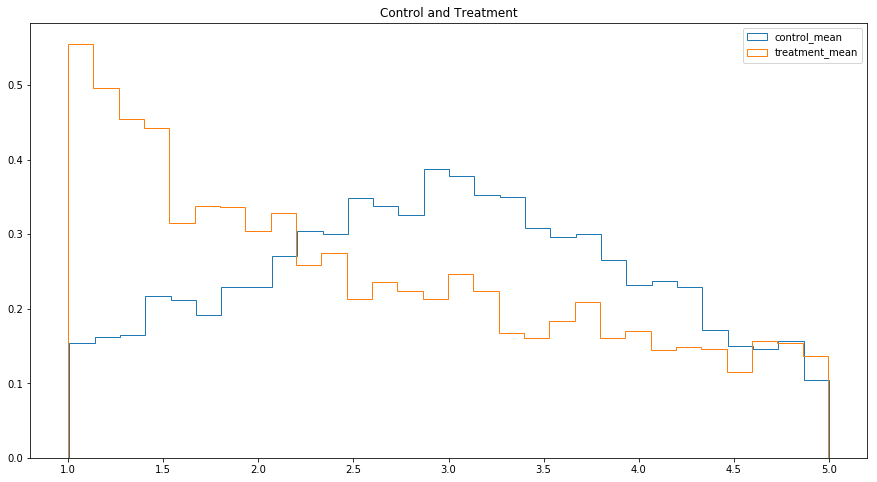

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), sharey=True)

plt.title('Control and Treatment')
i = 0
trace = traces[trace_names[i]]
ax.hist(trace['control_mean'], 30, histtype='step', normed=True, label='control_mean')
ax.hist(trace['treatment_mean'], 30, histtype='step', normed=True, label='treatment_mean')  

ax.legend(loc='best')